## Run data pipeline
Returns an aggegrated df to work with

In [1]:
# Only for Wesley %run "./Data"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Copy this cell to every new version of Main
#import dataframe
df = pd.read_parquet('/home/joelva/code/pgt-group-3/data/raw/10_sec_New/HECTORdataAggregated_20240506142622.parquet')

# Print the number of rows
print(f"Number of rows in the file: {len(df)}")

Number of rows in the file: 1087947


In [4]:
#Check for NANs 
import pandas as pd


nan_counts_df = df.isna().sum()

# Convert to string with no line width limit
nan_counts_str = nan_counts_df.to_string()

print(nan_counts_str)

Vdatetime               0
datetime                0
BatMaxV               143
BatMinV               143
BatSOC                145
BatTotalCurrent    159904
BatTotalVoltage       145
CompOnOff             144
StopOnOff             143
ThrottlePerc          144
BrakePerc             143
Signal                144
TotalDistance         144
FrontAxle          748593
RearAxle1          748592
RearAxle2          748605
CompPower             142
FC2AirFlow            145
FC2Cool               145
FC2Current            144
FC2Volt               145
FC3AirFlow            145
FC3Cool               145
FC3Current            145
FC3Volt               145
FC1AirFlow            145
FC1Cool               145
FC1Current            145
FC1Volt               145
GPSAltitude        859093
GPSLatitude             0
GPSLongitude            0
H2Perc             749195
H2Press               145
H2Temp                144
H2Weight              145
HVACDraw              143
MotorRPM              143
MotorTorque 

#Method 1 to handle NANS
#Fill NANs with last known value
df = df.fillna(method='ffill')

#Method 2 to handle NANs, Note, this may reduce the dataset to 10% of its size, handle NANS differenctly
#drop all NANs
df = df.dropna()

In [5]:
# Toon de kolomnamen
print(df.columns)

Index(['Vdatetime', 'datetime', 'BatMaxV', 'BatMinV', 'BatSOC',
       'BatTotalCurrent', 'BatTotalVoltage', 'CompOnOff', 'StopOnOff',
       'ThrottlePerc', 'BrakePerc', 'Signal', 'TotalDistance', 'FrontAxle',
       'RearAxle1', 'RearAxle2', 'CompPower', 'FC2AirFlow', 'FC2Cool',
       'FC2Current', 'FC2Volt', 'FC3AirFlow', 'FC3Cool', 'FC3Current',
       'FC3Volt', 'FC1AirFlow', 'FC1Cool', 'FC1Current', 'FC1Volt',
       'GPSAltitude', 'GPSLatitude', 'GPSLongitude', 'H2Perc', 'H2Press',
       'H2Temp', 'H2Weight', 'HVACDraw', 'MotorRPM', 'MotorTorque',
       'MotorUseCurrent', 'MotorTemp', 'BattOutputPower', 'MotorPowerDraw',
       'TotalFCPower', 'ActualSpeed', 'TotalPowerDraw', 'DayOfWeek',
       'TotalAxle', 'NetWeight', 'AirTemp', 'Is_Friday', 'Is_Monday',
       'Is_Saturday', 'Is_Sunday', 'Is_Thursday', 'Is_Tuesday', 'Is_Wednesday',
       'DistanceKM', 'MotorJoules', 'EEM', 'AltChange'],
      dtype='object')


#THIS IS A TEMPROARY CODE DUE TO THE FAILING OF FINDING CORRELATIONS WITH EEM!! Drop EEM and construct it again
df = df.drop('EEM', axis=1)




#THIS IS A TEMPROARY CODE DUE TO THE FAILING OF FINDING CORRELATIONS WITH EEM!! Drop EEM and construct it again
# Preparing for safe division
df['NetWeight_DistanceKM'] = df['NetWeight'] * df['DistanceKM']
df['NetWeight_DistanceKM'].replace(0, np.nan, inplace=True)  # Replace zero with NaN to prevent division by zero

# Calculate the new 'EMM' column
df['EEM'] = df['MotorJoules'] / df['NetWeight_DistanceKM']

# Optionally, handle NaN values if needed
df['EEM'].fillna(0, inplace=True)  # Fill NaNs with zero or another appropriate value

# Display the DataFrame to verify the new column
print(df[['MotorJoules', 'NetWeight', 'DistanceKM', 'EEM']])

#THIS IS A TEMPROARY CODE DUE TO THE FAILING OF FINDING CORRELATIONS WITH EEM!! Drop EEM and construct it again based on MotorJoules and NetWeight only
# Preparing for safe division
df['NetWeight'] = df['NetWeight'] 
df['NetWeight'].replace(0, np.nan, inplace=True)  # Replace zero with NaN to prevent division by zero

# Calculate the new 'EMM' column
df['EEM'] = df['MotorJoules'] / df['NetWeight']

# Optionally, handle NaN values if needed
df['EEM'].fillna(0, inplace=True)  # Fill NaNs with zero or another appropriate value

# Display the DataFrame to verify the new column
print(df[['MotorJoules', 'NetWeight', 'DistanceKM', 'EEM']])

## Import utilities
Import custom function

In [6]:
#Copy this cell to every new version of Main
%run "Utilities.ipynb" 

In [7]:
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [8]:
#Copy this cell to every new version of Main
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
#check min/max values and number of rows
import pandas as pd

min_datetime = df['Vdatetime'].min()
max_datetime = df['Vdatetime'].max()

print(f"Minimum datetime: {min_datetime}")
print(f"Maximum datetime: {max_datetime}")

df.shape
print(df.shape)

Minimum datetime: 2022-08-01 04:04:5
Maximum datetime: 2023-08-01 16:02:5
(1087947, 61)


In [10]:
#Copy this cell to every new version of Main 
# List data types of each column
dtypes_result = df.dtypes

# Display descriptive statistics for numerical columns
describe_result = df.describe()

# Combine both results in one code snippet
combined_result = pd.concat([dtypes_result, describe_result], axis=1, keys=['Data Types', 'Statistics'])

# Display the combined result
print(combined_result)


               Data Types                  Statistics               \
                        0                    datetime      BatMaxV   
Vdatetime          object                         NaN          NaN   
datetime   datetime64[us]                         NaN          NaN   
BatMaxV           float64                         NaN          NaN   
BatMinV           float64                         NaN          NaN   
BatSOC            float64                         NaN          NaN   
...                   ...                         ...          ...   
25%                   NaN  2022-10-06 06:37:04.870000  3690.700000   
50%                   NaN  2023-01-16 05:32:19.990000  3953.000000   
75%                   NaN  2023-04-09 04:09:44.870000  4155.200000   
max                   NaN  2023-08-01 16:02:53.680000  4179.800000   
std                   NaN                         NaN  1422.150453   

                                                                              \
         

In [11]:
 # Methode 1: Gebruik isna() of isnull() en dan sum()
aantal_nan = df.isna().sum()

# Methode 2: Gebruik any() om te controleren of er minstens één NaN-waarde is
heeft_nan = df.isna().any().any()

# Methode 3: Tel het aantal NaN-waarden in het hele DataFrame
totaal_aantal_nan = df.isna().sum().sum()

# Uitvoer resultaten
print("Aantal NaN per kolom:")
print(aantal_nan)
print("\nHeeft DataFrame NaN-waarden?")
print(heeft_nan)
print("\nTotaal aantal NaN-waarden in DataFrame:")
print(totaal_aantal_nan)

Aantal NaN per kolom:
Vdatetime            0
datetime             0
BatMaxV            143
BatMinV            143
BatSOC             145
                 ...  
Is_Wednesday         0
DistanceKM        1482
MotorJoules        146
EEM             168512
AltChange       932243
Length: 61, dtype: int64

Heeft DataFrame NaN-waarden?
True

Totaal aantal NaN-waarden in DataFrame:
6199132


In [12]:
#JoeCode check if rows contains all nans
all_nans=df.isna().all(axis=1)

nan_rows=df[all_nans]

print("rows with only nans:")
print(nan_rows)

nan_rows_count = all_nans.sum()
print("Number of rows where all values are NaNs:", nan_rows_count)


rows with only nans:
Empty DataFrame
Columns: [Vdatetime, datetime, BatMaxV, BatMinV, BatSOC, BatTotalCurrent, BatTotalVoltage, CompOnOff, StopOnOff, ThrottlePerc, BrakePerc, Signal, TotalDistance, FrontAxle, RearAxle1, RearAxle2, CompPower, FC2AirFlow, FC2Cool, FC2Current, FC2Volt, FC3AirFlow, FC3Cool, FC3Current, FC3Volt, FC1AirFlow, FC1Cool, FC1Current, FC1Volt, GPSAltitude, GPSLatitude, GPSLongitude, H2Perc, H2Press, H2Temp, H2Weight, HVACDraw, MotorRPM, MotorTorque, MotorUseCurrent, MotorTemp, BattOutputPower, MotorPowerDraw, TotalFCPower, ActualSpeed, TotalPowerDraw, DayOfWeek, TotalAxle, NetWeight, AirTemp, Is_Friday, Is_Monday, Is_Saturday, Is_Sunday, Is_Thursday, Is_Tuesday, Is_Wednesday, DistanceKM, MotorJoules, EEM, AltChange]
Index: []

[0 rows x 61 columns]
Number of rows where all values are NaNs: 0


In [13]:
df.describe

<bound method NDFrame.describe of                   Vdatetime                datetime   BatMaxV   BatMinV  \
4        2022-08-01 04:04:5 2022-08-01 04:04:59.770     0.000     0.000   
5        2022-08-01 04:05:0 2022-08-01 04:05:09.780     0.000     0.000   
6        2022-08-01 04:05:1 2022-08-01 04:05:19.980     0.000     0.000   
7        2022-08-01 04:05:2 2022-08-01 04:05:29.880     0.000     0.000   
8        2022-08-01 04:05:3 2022-08-01 04:05:39.890     0.000     0.000   
...                     ...                     ...       ...       ...   
1087949  2023-08-01 16:02:1 2023-08-01 16:02:19.960  4162.575  4129.075   
1087950  2023-08-01 16:02:2 2023-08-01 16:02:29.920  4162.150  4128.875   
1087951  2023-08-01 16:02:3 2023-08-01 16:02:39.940  4162.400  4129.000   
1087952  2023-08-01 16:02:4 2023-08-01 16:02:49.960  4162.625  4129.000   
1087953  2023-08-01 16:02:5 2023-08-01 16:02:53.680  4162.200  4129.000   

         BatSOC  BatTotalCurrent  BatTotalVoltage  CompOnOff  Sto

In [14]:
len(df)

1087947

#drop remaining NANs
df = df.dropna()

#Joecode to check columnnames after dropping nanas
df_noNAN = df
df_noNAN = df.dropna()

column_names = df_noNAN.columns.tolist()

# This will print the list of column names
print(column_names)

In [15]:
# Pokocode Create a boolean mask where all specified columns are zero, dropped MotorRPM 9when motor is not running) and TotalFCPower (when Fuelcell is not in use, <1 due to sensor is measurring very low watt)
mask = (df['ThrottlePerc'] == 0) & (df['ActualSpeed'] == 0) & (df['TotalPowerDraw'] == 0) & (df['MotorRPM']  == 0) & (df['TotalFCPower']  <= 1)

# Sum up the True values in the mask to get the count of rows where all conditions are met
count = mask.sum()

print(f'Number of instances where all three columns are zero: {count}')

Number of instances where all three columns are zero: 756067


In [16]:
#JoeCode, To not drop rows where the Compactor is working, check how many rows have the compactor activated (=1)
# Count the rows where 'CompOnOff' equals 1
count_rows_with_comp_on_off = (df['CompOnOff'] == 1).sum()

# Total number of rows in the DataFrame
total_rows = len(df)

# Calculate the percentage of rows where 'CompOnOff' equals 1
percentage_comp_on_off = (count_rows_with_comp_on_off / total_rows) * 100

print("Number of rows where 'CompOnOff' equals 1:", count_rows_with_comp_on_off)
print("Total number of rows in the DataFrame:", total_rows)
print("Percentage of rows where 'CompOnOff' equals 1: {:.2f}%".format(percentage_comp_on_off))



Number of rows where 'CompOnOff' equals 1: 184576
Total number of rows in the DataFrame: 1087947
Percentage of rows where 'CompOnOff' equals 1: 16.97%


In [17]:
 # Dropping rows where given conditions are met and storing the result in a new DataFrame df_filtered
conditions = (df['ThrottlePerc'] == 0) & (df['ActualSpeed'] == 0) & (df['TotalPowerDraw'] == 0) & (df['MotorRPM']  == 0) & (df['TotalFCPower']  <= 1 & (df['CompOnOff'] !=1))
count_zeros = df[conditions].shape[0]

# Print the number of rows with all four columns zero
print(f'Number of rows with all four conditions met: {count_zeros}')

df_filtered = df[~conditions]

# Print the number of remaining rows in the filtered DataFrame
print(f"Number of remaining rows in the DataFrame after filtering: {df_filtered.shape[0]}")

#switch dataframe name back to df
df =df_filtered

Number of rows with all four conditions met: 755912
Number of remaining rows in the DataFrame after filtering: 332035


#This cell is deactivated due to lomg running time
#check linear relationship with target variable EEM

def plot_linear_relationships(df, x_col, y_col, figsize=(4, 3)):
    """
    Plot the linear relationship between two columns from a DataFrame.
    
    - x_col: The name of the column to use as the x-axis.
    - y_col: The name of the column to use as the y-axis.
    - figsize: Tuple representing the figure size.
    """
    plt.figure(figsize=figsize)
    sns.regplot(x=x_col, y=y_col, data=df)
    plt.title(f'Linear Relationship between {x_col} and {y_col}')
    plt.show()

plot_linear_relationships(df, 'ThrottlePerc','EEM')
plot_linear_relationships(df, 'NetWeight','EEM')
plot_linear_relationships(df, 'H2Weight','EEM')
plot_linear_relationships(df, 'MotorRPM','EEM')
plot_linear_relationships(df, 'MotorTorque','EEM')
plot_linear_relationships(df, 'MotorTemp','EEM')
plot_linear_relationships(df, 'BattOutputPower','EEM')
plot_linear_relationships(df, 'TotalFCPower','EEM')
plot_linear_relationships(df, 'ActualSpeed','EEM')
plot_linear_relationships(df, 'BrakePerc','EEM')
plot_linear_relationships(df, 'AirTemp','EEM')
plot_linear_relationships(df, 'CompOnOff','EEM')

print("Plotting the linear relationship between Throttle Percentage and EEM...")
plot_linear_relationships(df, 'ThrottlePerc', 'EEM')

print("Plotting the linear relationship between NetWeight Load and EEM...")
plot_linear_relationships(df, 'NetWeight', 'EEM')

print("Plotting the linear relationship between H2Weight and EEM...")
plot_linear_relationships(df, 'H2Weight', 'EEM')

print("Plotting the linear relationship between otorRPMLoad and EEM...")
plot_linear_relationships(df, 'MotorRPM', 'EEM')

print("Plotting the linear relationship between MotorTorque and EEM...")
plot_linear_relationships(df, 'MotorTorque', 'EEM')

print("Plotting the linear relationship between MotorTemp Load and EEM...")
plot_linear_relationships(df, 'MotorTemp', 'EEM')

print("Plotting the linear relationship between BattOutputPower and EEM..")
plot_linear_relationships(df, 'BattOutputPower', 'EEM')

print("Plotting the linear relationship between TotalFCPower and EEM...")
plot_linear_relationships(df, 'TotalFCPower', 'EEM')

print("Plotting the linear relationship between ActualSpeed Load and EEM...")
plot_linear_relationships(df, 'ActualSpeed', 'EEM')

print("Plotting the linear relationship between BrakePerc Load and EEM...")
plot_linear_relationships(df, 'BrakePerc', 'EEM')

print("Plotting the linear relationship between AirTemp Load and EEM...")
plot_linear_relationships(df, 'AirTemp', 'EEM')

print("Plotting the linear relationship between CompOnOff Load and EEM...")
plot_linear_relationships(df, 'CompOnOff', 'EEM')

#Conclusion, none of the above features shows a strong linear relation with thetarget variable EEM and will be kept


#This cell is deactiated due to runtime 
#pairplot to check if variables with high correlation  can be dropped-


sns.pairplot(df, hue='EEM')
plt.show()



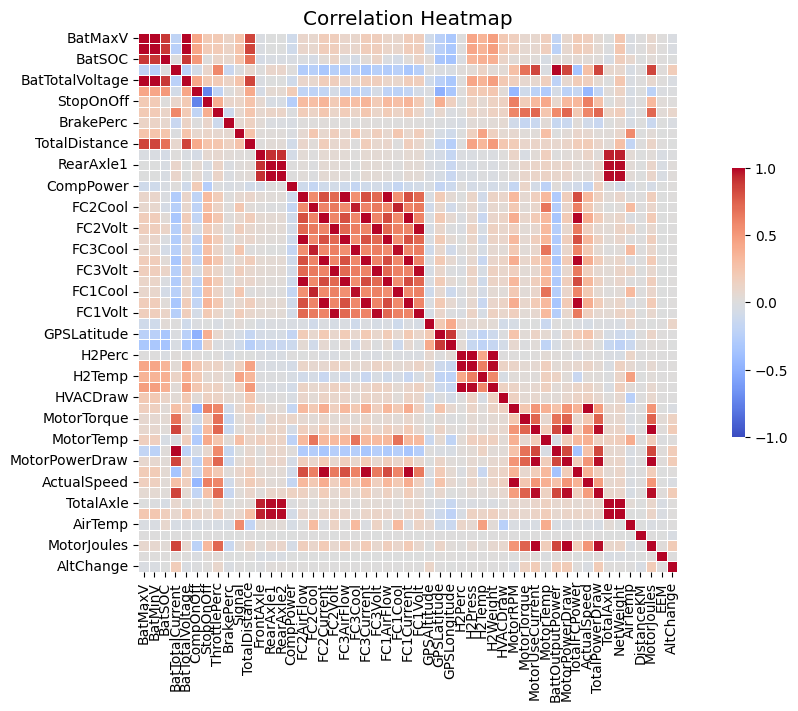

In [18]:
#Heatmap to check if variables with high correlation  can be dropped
floats = df.select_dtypes(include="float64")
df1 = floats.corr()

# Set up the heatmap figure size
plt.figure(figsize=(14, 7))

# Customize the heatmap using seaborn's heatmap function without annotations
heatmap = sns.heatmap(
    df1,
    cmap="coolwarm",
    vmin=-1, vmax=1,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
)

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Set font scale for better readability
sns.set(font_scale=1.2)

# Add a title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

#check for other features with possible high correlation

import pandas as pd


# Calculate the correlation between 'TotalPowerDraw' and 'MotorPowerDraw'
correlation1 = df['TotalPowerDraw'].corr(df['MotorPowerDraw'])

# Calculate the correlation between 'TotalPowerDraw' and 'MotorPowerDraw'
correlation2= df['BattOutputPower'].corr(df['BatTotalVoltage'])

# Calculate the correlation between 'TotalPowerDraw' and 'MotorPowerDraw'
correlation3= df['BattOutputPower'].corr(df['BatTotalCurrent'])

# Calculate the correlation between 'TotalPowerDraw' and 'MotorPowerDraw'
correlation4= df['TotalPowerDraw'].corr(df['EEM'])

# Calculate the correlation between 'TotalPowerDraw' and 'MotorPowerDraw'
correlation5= df['NetWeight'].corr(df['EEM'])

# Calculate the correlation between 'DistanceKM' and 'MotorPowerDraw'
correlation6= df['DistanceKM'].corr(df['EEM'])

# Print the correlation value
print("Correlation between TotalPowerDraw and MotorPowerDraw:", correlation1)
print("Correlation between BattOutputPower and BatTotalVoltage:", correlation2)
print("Correlation between BattOutputPower and BatTotalCurrent:", correlation3)
print("Correlation between TotalPowerDraw and EEM:", correlation4)
print("Correlation between NetWeight and EEM:", correlation5)
print("Correlation between DistanceKM and EEM:", correlation6)



In [19]:
#Joecode, check number of NANs before splitting train and test set
#Check for Nans  before regression
# Count the number of NaNs in each column
nan_counts_df = df.isna().sum()

pd.set_option('display.max_columns', None)
# Print the count of NaNs for each column
print(nan_counts_df)


Vdatetime            0
datetime             0
BatMaxV            143
BatMinV            143
BatSOC             145
                 ...  
Is_Wednesday         0
DistanceKM         518
MotorJoules        146
EEM              10317
AltChange       192263
Length: 61, dtype: int64


In [20]:
#JoeCode remove the rows with NANs that has NANS in target EMM
df = df.dropna(subset=['EEM'])

In [21]:
#JoeCode , replace NANS on other columns with more than 1000 NANs
# Replace NaNs in the column 'AltChange ' with 0
df['AltChange'] = df['AltChange'].fillna(0)

# Fill 'NetWeight', 'TotalAxle', 'FrontAxle', 'RearAxle1', 'RearAxle2', 'H2Perc' with the last known value
columns_last_known = ['NetWeight', 'TotalAxle', 'FrontAxle', 'RearAxle1', 'RearAxle2', 'H2Perc']
df[columns_last_known] = df[columns_last_known].fillna(method='ffill')

# Fill 'TotalFCPower', 'BattOutputPower', 'BatTotalCurrent' with average of previous last known and preceding first known values
def fill_with_avg(df, column):
    # Get the series where NaNs are located
    nan_indices = df[column].isna()
    
    # Calculate rolling average before and after NaN values
    forward_fill = df[column].fillna(method='ffill')
    backward_fill = df[column].fillna(method='bfill')
    
    # Calculate average of forward and backward fill values
    df[column] = np.where(nan_indices, (forward_fill + backward_fill) / 2, df[column])

columns_avg = ['TotalFCPower', 'BattOutputPower', 'BatTotalCurrent']
for column in columns_avg:
    fill_with_avg(df, column)

# Drop all other rows containing NaNs
df.dropna(inplace=True)

# Print the updated DataFrame to verify changes
print(df)


/tmp/ipykernel_1206/272663820.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AltChange'] = df['AltChange'].fillna(0)
/tmp/ipykernel_1206/272663820.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[columns_last_known] = df[columns_last_known].fillna(method='ffill')
/tmp/ipykernel_1206/272663820.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_last_known] = df[columns_last_known].fillna(meth

                  Vdatetime                datetime   BatMaxV   BatMinV  \
23       2022-08-01 04:08:0 2022-08-01 04:08:09.900  4144.650  4118.450   
24       2022-08-01 04:08:1 2022-08-01 04:08:19.880  4141.575  4115.650   
25       2022-08-01 04:08:2 2022-08-01 04:08:29.870  4122.875  4096.500   
26       2022-08-01 04:08:3 2022-08-01 04:08:39.850  4139.500  4104.050   
27       2022-08-01 04:08:4 2022-08-01 04:08:49.860  4080.750  4017.075   
...                     ...                     ...       ...       ...   
1086232  2023-08-01 11:16:0 2023-08-01 11:16:09.940  3649.150  3578.575   
1086233  2023-08-01 11:16:1 2023-08-01 11:16:19.930  3664.575  3621.850   
1086234  2023-08-01 11:16:2 2023-08-01 11:16:29.880  3645.650  3618.125   
1086235  2023-08-01 11:16:3 2023-08-01 11:16:39.830  3647.850  3619.850   
1086237  2023-08-01 11:16:5 2023-08-01 11:16:59.830  3650.050  3617.225   

         BatSOC  BatTotalCurrent  BatTotalVoltage  CompOnOff  StopOnOff  \
23        100.0         

In [22]:
#Joecode, check number of NANs before splitting train and test set
#Check for Nans  before regression
# Count the number of NaNs in each column
nan_counts_df = df.isna().sum()

pd.set_option('display.max_columns', None)
# Print the count of NaNs for each column
print(nan_counts_df)

Vdatetime       0
datetime        0
BatMaxV         0
BatMinV         0
BatSOC          0
               ..
Is_Wednesday    0
DistanceKM      0
MotorJoules     0
EEM             0
AltChange       0
Length: 61, dtype: int64


In [23]:
df.head()

,Vdatetime,datetime,BatMaxV,BatMinV,BatSOC,BatTotalCurrent,BatTotalVoltage,CompOnOff,StopOnOff,ThrottlePerc,BrakePerc,Signal,TotalDistance,FrontAxle,RearAxle1,RearAxle2,CompPower,FC2AirFlow,FC2Cool,FC2Current,FC2Volt,FC3AirFlow,FC3Cool,FC3Current,FC3Volt,FC1AirFlow,FC1Cool,FC1Current,FC1Volt,GPSAltitude,GPSLatitude,GPSLongitude,H2Perc,H2Press,H2Temp,H2Weight,HVACDraw,MotorRPM,MotorTorque,MotorUseCurrent,MotorTemp,BattOutputPower,MotorPowerDraw,TotalFCPower,ActualSpeed,TotalPowerDraw,DayOfWeek,TotalAxle,NetWeight,AirTemp,Is_Friday,Is_Monday,Is_Saturday,Is_Sunday,Is_Thursday,Is_Tuesday,Is_Wednesday,DistanceKM,MotorJoules,EEM,AltChange
23,2022-08-01 04:08:0,2022-08-01 04:08:09.900,4144.650,4118.450,100.0,28.650,652.750,0.0,1.0,276.9,0.0,0.0,2.323257e+07,5937.5,6605.0,4882.5,0.0,0.0,25.300001,-5.000000e-03,0.1,0.0,25.3975,-0.4675,0.1,0.0,24.9000,-0.4225,0.1,41.675,51.422737,6.744465,41.825,255.875,23.0,6649.300,0.250,40.425,848.425,165.125,25.096154,18697.625,10775.9700,-0.08950,7.074375,10817.866667,Monday,17600.0,600.0,20.6,0,1,0,0,0,0,0,0.000882,107759.700,203685.667713,0.000
24,2022-08-01 04:08:1,2022-08-01 04:08:19.880,4141.575,4115.650,100.0,31.625,652.200,0.0,1.0,252.6,0.0,0.0,2.323259e+07,5995.0,6642.5,4895.0,0.0,0.0,25.300001,9.250000e-02,0.1,0.0,25.3975,-0.5150,0.1,0.0,24.9000,-0.4075,0.1,41.840,51.422697,6.744647,41.925,255.975,23.0,6650.675,0.075,58.575,777.050,190.575,25.872727,20614.725,12420.8750,-0.08300,10.250625,12420.875000,Monday,17900.0,900.0,20.6,0,1,0,0,0,0,0,0.013397,124208.750,10301.466510,0.165
25,2022-08-01 04:08:2,2022-08-01 04:08:29.870,4122.875,4096.500,100.0,63.100,648.925,0.0,1.0,344.9,1.8,0.0,2.323263e+07,5910.0,6687.5,4915.0,0.0,0.0,25.300001,-2.081668e-18,0.1,0.0,25.3825,-0.5150,0.1,0.0,24.9000,-0.4200,0.1,40.030,51.422532,6.744567,41.800,255.900,23.0,6648.700,0.250,99.325,1191.675,513.300,26.000000,40926.925,33299.9425,-0.09350,17.381875,33299.942500,Monday,17800.0,800.0,20.6,0,1,0,0,0,0,0,0.019182,332999.425,21699.800220,-1.810
26,2022-08-01 04:08:3,2022-08-01 04:08:39.850,4139.500,4104.050,100.0,35.750,650.975,0.0,1.0,267.3,58.7,0.0,2.323267e+07,6062.5,6545.0,4830.0,0.0,0.0,25.300001,5.750000e-02,0.1,0.0,25.3925,-0.4900,0.1,0.0,24.8925,-0.3900,0.1,38.250,51.422293,6.744030,41.850,255.850,23.0,6648.725,0.650,46.850,1354.650,206.475,26.000000,23174.600,13373.2000,-0.08225,8.198750,13373.200000,Monday,17900.0,900.0,20.6,0,1,0,0,0,0,0,0.045789,133732.000,3245.146974,-1.780
27,2022-08-01 04:08:4,2022-08-01 04:08:49.860,4080.750,4017.075,100.0,169.050,638.775,0.0,1.0,539.3,0.0,0.0,2.323270e+07,5787.5,6840.0,5005.0,0.0,0.0,25.300001,3.000000e-02,0.1,0.0,25.3925,-0.4625,0.1,0.0,24.8950,-0.3675,0.1,36.975,51.422113,6.744443,41.950,256.000,23.0,6652.050,-4.425,144.250,2686.525,1569.875,26.694915,107926.500,100217.5775,-0.08000,25.243750,100217.577500,Monday,18100.0,1100.0,20.6,0,1,0,0,0,0,0,0.035038,1002175.775,26002.304629,-1.275


In [24]:
#Select the varaibles to inlcude in the test and trainset X set and separate the target y fort test and train
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#Target variable: Since 'EEM'='MotorJoules' /() 'NetWeight' * 'DistanceKM') is the target ,we need to drop all features used to construct EEM
#Motorjoules is dropped (original feature "MotorJoules based on 'MotorPowerDraw')
    #Drop 'MotorPowerDraw'
#NetWeight is dropped (original feature "TotalAxle")
    #Drop  'TotalAxle'
#TotalDistance is dropped (original feature "TotalDistance")

#Features with high correlation between themselves and similair correlation with the target varianle EEM are dropped, only one is kept
    #BatMaxV is dropped, BatSOC is kept 
    #RearAxle1 is dropped, TotalAxle is kept (but will be dropped due to its inclusion in the target variable EMM )
    #FC2Cool,FC3Cool, FC2Volt, FC3Volt is dropped, FC1Cool and FC1Volt is kept
    #TotalPowerDraw is dropped, MotorPowerDraw is kept (but will be dropped due to its inclusion in the target variable EMM )
    #BattOutputPower is dropped BatTotalCurrent is kept





# Verwijder niet-noodzakelijke kolommen en splits de data
#Original set for training data 
#X = df.drop(['Vdatetime','EEM','datetime', 'MotorJoules','MotorPowerDraw', 'NetWeight', 'TotalAxle', 'TotalDistance' ,'BatMaxV', 'RearAxle1', 'FC2Cool', 'FC3Cool','FC3Volt', 'FC2Cool' , 'DayOfWeek','Is_Friday', 'Is_Monday', 'Is_Saturday', 'Is_Sunday', 'Is_Thursday', 'Is_Tuesday', 'Is_Wednesday'], axis=1)  # Veronderstel dat deze kolommen zijn verwijderd

#Experimental set for training data-add 'NetWeight','TotalDistance','MotorPowerDraw',
#X = df.drop(['Vdatetime','EEM','datetime', 'MotorJoules', 'TotalAxle', 'BatMaxV', 'RearAxle1', 'FC2Cool', 'FC3Cool','FC3Volt', 'FC2Cool' , 'DayOfWeek','Is_Friday', 'Is_Monday', 'Is_Saturday', 'Is_Sunday', 'Is_Thursday', 'Is_Tuesday', 'Is_Wednesday'], axis=1)  # Veronderstel dat deze kolommen zijn verwijder
X = df.drop(['EEM', 'TotalAxle', 'NetWeight','DistanceKM', 'MotorJoules','MotorPowerDraw','TotalPowerDraw','FrontAxle', 'RearAxle1', 'RearAxle2','Vdatetime','datetime', 'DayOfWeek','Is_Friday', 'Is_Monday', 'Is_Saturday', 'Is_Sunday', 'Is_Thursday', 'Is_Tuesday', 'Is_Wednesday' ], axis=1)  # Veronderstel dat deze kolommen zijn verwijderd
y = df['EEM']

# Normaliseer de data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [25]:
X.columns

Index(['BatMaxV', 'BatMinV', 'BatSOC', 'BatTotalCurrent', 'BatTotalVoltage',
       'CompOnOff', 'StopOnOff', 'ThrottlePerc', 'BrakePerc', 'Signal',
       'TotalDistance', 'CompPower', 'FC2AirFlow', 'FC2Cool', 'FC2Current',
       'FC2Volt', 'FC3AirFlow', 'FC3Cool', 'FC3Current', 'FC3Volt',
       'FC1AirFlow', 'FC1Cool', 'FC1Current', 'FC1Volt', 'GPSAltitude',
       'GPSLatitude', 'GPSLongitude', 'H2Perc', 'H2Press', 'H2Temp',
       'H2Weight', 'HVACDraw', 'MotorRPM', 'MotorTorque', 'MotorUseCurrent',
       'MotorTemp', 'BattOutputPower', 'TotalFCPower', 'ActualSpeed',
       'AirTemp', 'AltChange'],
      dtype='object')

In [26]:
# Splits de data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

#Print the number of rows in X_train and X_test
print("Number of rows in X_train:", X_train.shape[0])
print("Number of rows in X_test:", X_test.shape[0])
print("Number of rows in y_train:", y_train.shape[0])
print("Number of rows in y_test:", y_test.shape[0])

Number of rows in X_train: 136908
Number of rows in X_test: 34227
Number of rows in y_train: 136908
Number of rows in y_test: 34227


In [27]:
y
print("Number of rows in y", y.shape[0])

Number of rows in y 171135


In [28]:
#Check for Nans  before regression
# Count the number of NaNs in each column
nan_counts_X_train = X_train.isna().sum()


# Print the count of NaNs for each column
print(nan_counts_X_train)



BatMaxV            0
BatMinV            0
BatSOC             0
BatTotalCurrent    0
BatTotalVoltage    0
CompOnOff          0
StopOnOff          0
ThrottlePerc       0
BrakePerc          0
Signal             0
TotalDistance      0
CompPower          0
FC2AirFlow         0
FC2Cool            0
FC2Current         0
FC2Volt            0
FC3AirFlow         0
FC3Cool            0
FC3Current         0
FC3Volt            0
FC1AirFlow         0
FC1Cool            0
FC1Current         0
FC1Volt            0
GPSAltitude        0
GPSLatitude        0
GPSLongitude       0
H2Perc             0
H2Press            0
H2Temp             0
H2Weight           0
HVACDraw           0
MotorRPM           0
MotorTorque        0
MotorUseCurrent    0
MotorTemp          0
BattOutputPower    0
TotalFCPower       0
ActualSpeed        0
AirTemp            0
AltChange          0
dtype: int64


In [29]:
nan_counts_y_train = y_train.isna().sum()
print(nan_counts_y_train)

0


In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import numpy as np

#  X_train, X_test, y_train, y_test are predefined
# Step 1: Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Fitting the OLS model
X_train_scaled_with_const = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train, X_train_scaled_with_const).fit()

# Step 3: Testing the model
X_test_scaled_with_const = sm.add_constant(X_test_scaled)
y_pred = model.predict(X_test_scaled_with_const)
mse = mean_squared_error(y_test, y_pred)

# Display the results
print(model.summary())
print("Mean Squared Error on Test Set:", mse)


                            OLS Regression Results                            
Dep. Variable:                    EEM   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     16.81
Date:                Mon, 27 May 2024   Prob (F-statistic):          1.73e-115
Time:                        17:14:47   Log-Likelihood:            -2.0960e+06
No. Observations:              136908   AIC:                         4.192e+06
Df Residuals:                  136867   BIC:                         4.193e+06
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.403e+04   2914.225     11.679      0.0

In [31]:
#Check num of rows , colums and type in the X_Scaled set and y set
print(X_train_scaled.shape)
print(type(X_train_scaled))
print(y.shape)
print(type(y))

(136908, 41)
<class 'numpy.ndarray'>
(171135,)
<class 'pandas.core.series.Series'>


In [32]:
#Check that X_scaled is scaled 
print(X_train_scaled)
#X is scaled
y
print(y)
#y is not scaled


[[-0.13863637 -0.11595919 -0.8329244  ...  1.21861795  0.61275698
  -0.24951523]
 [-0.26465454 -0.2345687  -1.00668152 ...  0.14565068  0.65309226
   0.76176558]
 [-0.11243668 -0.14387437 -0.48541016 ...  0.36095087 -1.69979909
   0.3133107 ]
 ...
 [-0.06677799 -0.20979762 -0.42749111 ...  0.36791796 -1.256111
   0.05561754]
 [ 0.48672723  0.41480754  1.25216106 ...  0.04220061  0.50519623
   0.75574605]
 [-0.41207978 -0.41184729 -1.10224794 ...  2.35246776 -1.63257362
   0.0514612 ]]
23         203685.667713
24          10301.466510
25          21699.800220
26           3245.146974
27          26002.304629
               ...      
1086232     27022.244447
1086233    -15413.267768
1086234     24648.455314
1086235     21390.241732
1086237     90882.136676
Name: EEM, Length: 171135, dtype: float64


END OF PREPROCESSING    

In [33]:
#check which format the dataset is
print(type(X_train_scaled))
print(type(y))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [34]:
#check which format the dataset is
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [40]:
# train a linear regression model, use the scaled trainingset X_scaled
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create a scaler object
scaler = StandardScaler()

# Fit on training data and transform both X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 3: Make predictions
y_pred = model.predict(X_test_scaled)

# Step 4: Evaluate the model
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Coefficient of Determination (R^2): {r2}")

# Get the feature names
feature_names = X_train.columns

# Get the coefficients from the model
coefficients = model.coef_

# Pair each feature name with its corresponding coefficient
feature_coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Print the feature names alongside their coefficients
print(feature_coefficients)

Mean Absolute Error (MAE): 78244.9161831923
Mean Squared Error (MSE): 556655739339.9578
Coefficient of Determination (R^2): 0.007724858685664748
            Feature    Coefficient
0           BatMaxV  168591.048335
1           BatMinV -160633.941575
2            BatSOC   -9897.976894
3   BatTotalCurrent   87376.065305
4   BatTotalVoltage   13246.754131
5         CompOnOff  -40970.333265
6         StopOnOff   -5995.920453
7      ThrottlePerc   26568.772773
8         BrakePerc     956.532558
9            Signal    1623.489138
10    TotalDistance    -357.426138
11        CompPower   -6297.651372
12       FC2AirFlow   36117.122412
13          FC2Cool    5645.691489
14       FC2Current  265752.173830
15          FC2Volt  -14513.258746
16       FC3AirFlow   15951.121058
17          FC3Cool   -7890.898828
18       FC3Current -403451.704391
19          FC3Volt  -34384.609098
20       FC1AirFlow  -53188.137019
21          FC1Cool   10962.263080
22       FC1Current  141220.358736
23          FC1

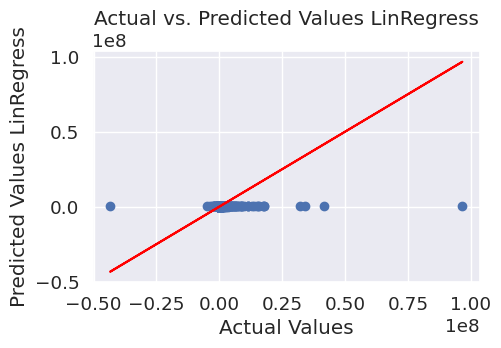

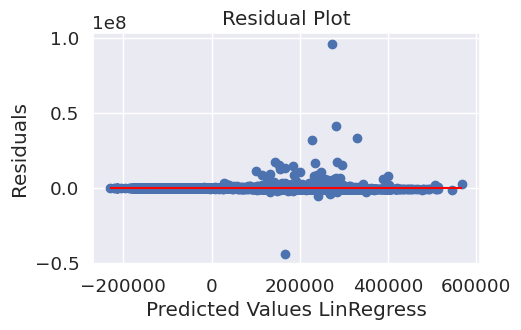

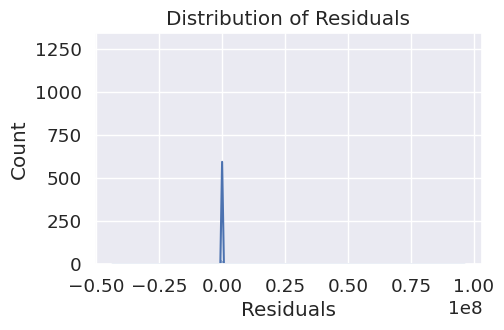

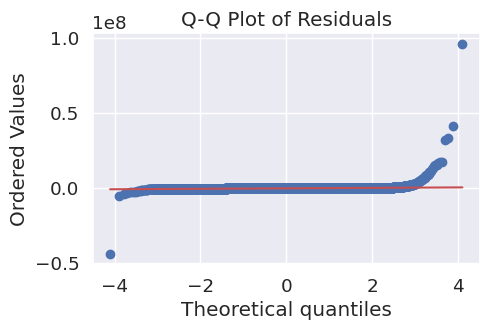

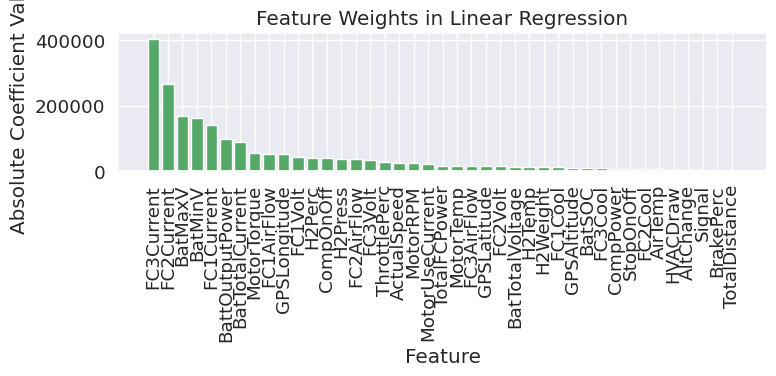

In [36]:
# residuals, predict vs actuals, qq plots for LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression



# Training a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predicting values for the testing set
y_pred = model.predict(X_test_scaled)

# Plotting Actual vs. Predicted Values
plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')  # Ideal line where predicted values equal actual values
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values LinRegress')
plt.title('Actual vs. Predicted Values LinRegress')
plt.show()

# Calculating residuals
residuals = y_test - y_pred

# Plotting Residuals
plt.figure(figsize=(5, 3))
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), color='red')
plt.xlabel('Predicted Values LinRegress')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Distribution of Residuals
plt.figure(figsize=(5, 3))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

# Q-Q Plot of Residuals
plt.figure(figsize=(5, 3))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Assuming 'model' is your trained LinearRegression instance and 'X_train' is your feature DataFrame
coefficients = model.coef_

# Getting absolute values of coefficients to somewhat mimic "importance"
absolute_coefficients = np.abs(coefficients)

# Sorting indices of coefficients by their absolute values in descending order
indices = np.argsort(absolute_coefficients)[::-1]

# Plotting the coefficients (mimicking feature importances)
plt.figure(figsize=(8, 4))
sorted_feature_names = np.array(X_train.columns)[indices]
plt.title('Feature Weights in Linear Regression')
plt.bar(range(X_train.shape[1]), absolute_coefficients[indices], color='g', align='center')
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()



In [37]:
#Run the model on a selection of the data


def predict_EEM(df, model):
    """
    Applies a trained Linear Regression model to predict 'EEM' on a new dataset.

    Parameters:
 df_hourly_numeric (DataFrame or ndarray): The original dataset containing the independent variables.
    model (LinearRegression): The trained Linear Regression model.

    Returns:
    ndarray: Predicted values for 'TotalPowerDraw'.
    """

    # Check if orig_data is a DataFrame or ndarray and select features accordingly
    if isinstance(df, pd.DataFrame):
        # If orig_data is a DataFrame, ensure it contains the same features as X_train
        features = df[X_train_scaled.columns] if 'X_train_scaled' in globals() or 'X_train_scaled' in locals() else df
    elif isinstance(df, np.ndarray):
        # If orig_data is an ndarray, assume it's already structured correctly
        features = df
    else:
        raise ValueError("orig_data must be a pandas DataFrame or a numpy ndarray.")

    # Use the model to make predictions on the provided features
    predictions = model.predict(features)

    return predictions

# Example usage:
# predictions = predict_EMM(orig_data, model)


APPLY THE MODEL ON THE ORIGINAL DATASET

In [38]:
#Apply the LinRegress model on the original data 

import pandas as pd

# Assuming 'df', 'model', and 'X_train' are already defined


feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else ["BatSOC", "ThrottlePerc", "RearAxle1", "H2Weight", "MotorRPM", "MotorTemp", "BattOutputPower", "TotalFCPower",  "ActualSpeed", "AirTemp"]

# Selecting the relevant features from the new dataframe
X_new = df[feature_names]

# Drop the nans
X_new_cleaned = X_new.dropna()

# Making predictions
y_new_pred = model.predict(X_new_cleaned)

# Insert predictions into the cleaned DataFrame
X_new_cleaned['Predicted_EEM'] = y_new_pred

# If you want to merge the predictions back into the original DataFrame, use an identifier or index to merge on
# Assuming df_hourly_numeric and X_new_cleaned share a common index or identifier that survived the dropna
# For simplicity, if the index is maintained, you can reindex or merge based on the index

df_with_predictions = df.merge(X_new_cleaned[['Predicted_TotalPowerDraw']], how='left', left_index=True, right_index=True)

# Now df_hourly_numeric_with_predictions contains the original data plus a new column with predicted values where available, NaNs elsewhere


/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


KeyError: "None of [Index(['Predicted_TotalPowerDraw'], dtype='object')] are in the [columns]"

In [31]:
#Apply the LinRegress model on the original data 

import pandas as pd

# Assuming 'df', 'model', and 'X_train' are already defined


feature_names = X_train.columns 

# Selecting the relevant features from the new dataframe
X_new = df[feature_names]

# Drop the nans
X_new_cleaned = X_new.dropna()

# Making predictions
y_new_pred = model.predict(X_new_cleaned)

# Insert predictions into the cleaned DataFrame
X_new_cleaned['Predicted_EEM'] = y_new_pred

# If you want to merge the predictions back into the original DataFrame, use an identifier or index to merge on
# Assuming df_hourly_numeric and X_new_cleaned share a common index or identifier that survived the dropna
# For simplicity, if the index is maintained, you can reindex or merge based on the index

df_with_predictions = df.merge(X_new_cleaned[['Predicted_EEM']], how='left', left_index=True, right_index=True)

# Now df_hourly_numeric_with_predictions contains the original data plus a new column with predicted values where available, NaNs elsewhere


ValueError: shapes (171135,41) and (42,) not aligned: 41 (dim 1) != 42 (dim 0)

In [320]:
selected_columns_EEM = df_with_predictions[['datetime', 'EEM', 'Predicted_EEM']]

In [321]:
selected_columns_EEM

,datetime,EEM,Predicted_EEM
23,2022-08-01 04:08:09.900,203685.667713,-9.949968e+09
24,2022-08-01 04:08:19.880,10301.466510,-1.014314e+10
25,2022-08-01 04:08:29.870,21699.800220,-1.211363e+10
26,2022-08-01 04:08:39.850,3245.146974,-1.036024e+10
27,2022-08-01 04:08:49.860,26002.304629,-1.860038e+10
...,...,...,...
1086232,2023-08-01 11:16:09.940,27022.244447,-1.219088e+10
1086233,2023-08-01 11:16:19.930,-15413.267768,-1.117301e+10
1086234,2023-08-01 11:16:29.880,24648.455314,-1.306939e+10
1086235,2023-08-01 11:16:39.830,21390.241732,-1.271418e+10


RANDOMFOREST

In [322]:
#find the best hyperparamters for 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# X_scaled, y, X_train, y_train, X_test, and y_test are already defined

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [10, 50, 100, 200, 300, 400, 500]  # You can adjust this list based on your computational budget
}

# Create a RandomForestRegressor object
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf = grid_search.best_estimator_

# Print the best number of trees
print("Best number of trees (n_estimators):", best_rf.n_estimators)

# Optionally, evaluate its performance on the test set
predictions = best_rf.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Test MSE for the best model:", mse)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


0.02s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
403545.39s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
403545.87s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
0.02s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen 

: 

In [32]:
#Run RandomForestRegressor with Best number of trees (n_estimators): 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# X_scaled, y, X_train, y_train, X_test, and y_test are already defined

# Create the RandomForestRegressor object
# n_estimators is the number of trees in the forest, you can adjust this and other parameters as needed
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest_regressor.fit(X_train, y_train)

# Make predictions on the training set and the test set
y_train_pred = random_forest_regressor.predict(X_train)
y_test_pred = random_forest_regressor.predict(X_test)

# Calculate the performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the performance metrics
print(f"Training MSE: {train_mse:.3f}")
print(f"Test MSE: {test_mse:.3f}")
print(f"Training R^2: {train_r2:.3f}")
print(f"Test R^2: {test_r2:.3f}")

# Feature Importance
feature_importances = random_forest_regressor.feature_importances_
# Assuming you want to print feature importance
print("Feature Importances:")
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance:.3f}")

Training MSE: 183318052839.113
Test MSE: 571650428877.044
Training R^2: 0.843
Test R^2: -0.019
Feature Importances:
Feature 0: 0.058
Feature 1: 0.022
Feature 2: 0.022
Feature 3: 0.012
Feature 4: 0.038
Feature 5: 0.002
Feature 6: 0.006
Feature 7: 0.041
Feature 8: 0.063
Feature 9: 0.002
Feature 10: 0.014
Feature 11: 0.008
Feature 12: 0.001
Feature 13: 0.009
Feature 14: 0.010
Feature 15: 0.007
Feature 16: 0.002
Feature 17: 0.009
Feature 18: 0.013
Feature 19: 0.002
Feature 20: 0.001
Feature 21: 0.008
Feature 22: 0.010
Feature 23: 0.007
Feature 24: 0.017
Feature 25: 0.072
Feature 26: 0.022
Feature 27: 0.012
Feature 28: 0.017
Feature 29: 0.062
Feature 30: 0.010
Feature 31: 0.144
Feature 32: 0.022
Feature 33: 0.082
Feature 34: 0.009
Feature 35: 0.080
Feature 36: 0.011
Feature 37: 0.008
Feature 38: 0.015
Feature 39: 0.044
Feature 40: 0.006


: 

RF Training MSE: 546864.009
RF Test MSE: 31399997.937
RF Training R^2: 0.996
RF Test R^2: 0.811


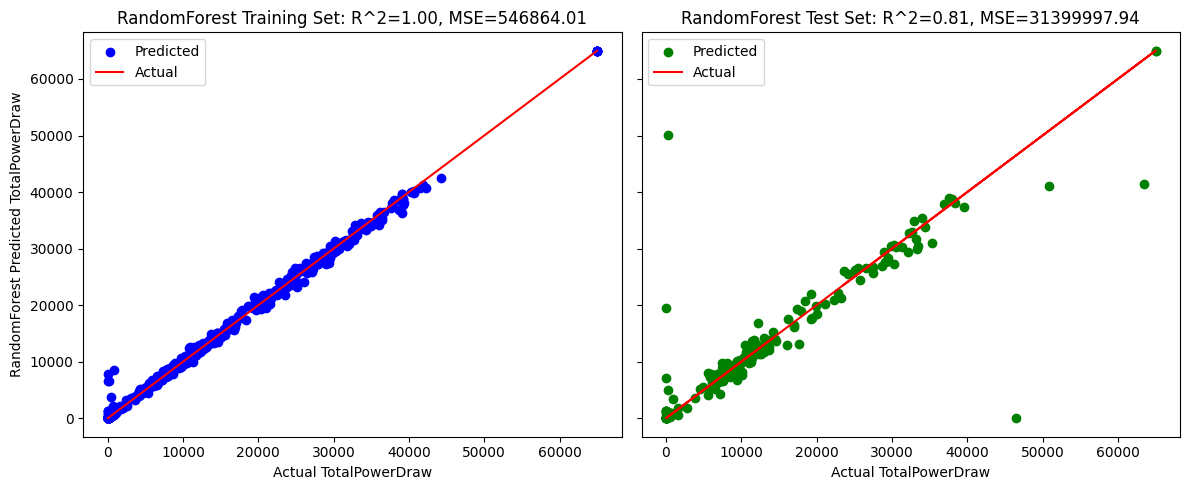

<Figure size 1000x600 with 0 Axes>

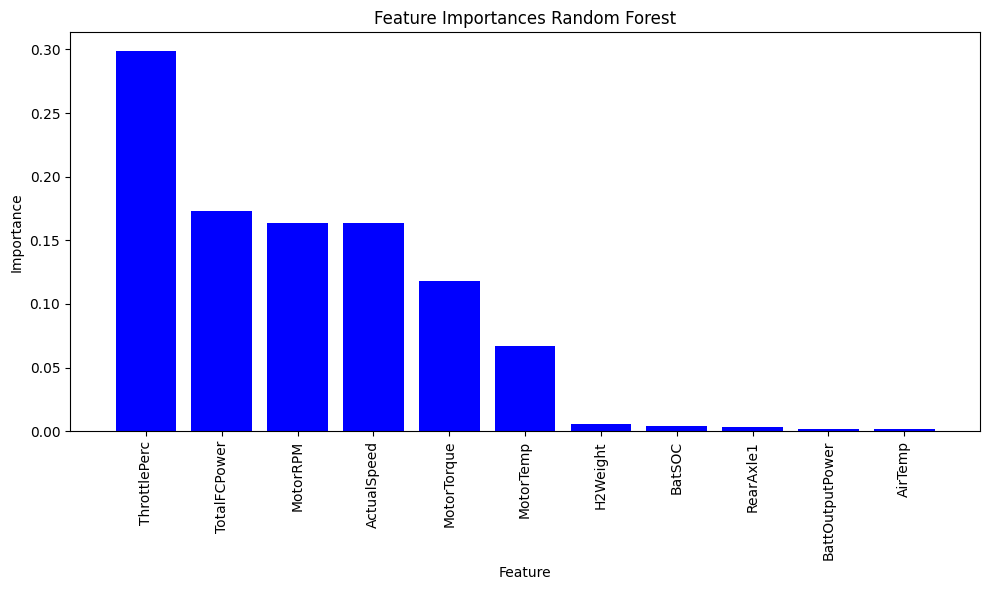

In [226]:
#Random Forest for Regressions

from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# defined y_train, y_train_pred, y_test, and y_test_pred from your model's predictions

# Calculate the performance metrics for the training and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


# Calculate and print performance metrics
print(f"RF Training MSE: {mean_squared_error(y_train, y_train_pred):.3f}")
print(f"RF Test MSE: {mean_squared_error(y_test, y_test_pred):.3f}")
print(f"RF Training R^2: {r2_score(y_train, y_train_pred):.3f}")
print(f"RF Test R^2: {r2_score(y_test, y_test_pred):.3f}")

# Plotting the Actual vs. Predicted values for both training and test sets
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Training set plot
ax[0].scatter(y_train, y_train_pred, color='blue', label='Predicted')
ax[0].plot(y_train, y_train, color='red', label='Actual')  # A line for perfect predictions
ax[0].set_title(f'RandomForest Training Set: R^2={train_r2:.2f}, MSE={train_mse:.2f}')
ax[0].set_xlabel('Actual TotalPowerDraw')
ax[0].set_ylabel('RandomForest Predicted TotalPowerDraw')
ax[0].legend()

# Test set plot
ax[1].scatter(y_test, y_test_pred, color='green', label='Predicted')
ax[1].plot(y_test, y_test, color='red', label='Actual')  # A line for perfect predictions
ax[1].set_title(f'RandomForest Test Set: R^2={test_r2:.2f}, MSE={test_mse:.2f}')
ax[1].set_xlabel('Actual TotalPowerDraw')
ax[1].legend()

plt.tight_layout()
plt.show()

# Plotting feature importances
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
# Get the feature names in the order of importance
sorted_feature_names = np.array(X_train.columns)[indices]

# Sort the indices of feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Then, retrieve the sorted feature names based on these indices
sorted_feature_names = X_train.columns[indices]

# Now, let's plot the feature importances in descending order
plt.figure(figsize=(10, 6))
plt.title('Feature Importances Random Forest')
plt.bar(range(X_train.shape[1]), feature_importances[indices], color='b', align='center')
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()  # This can help with fitting the labels
plt.show()


In [227]:
#Apply the Random forest model on the original data

import pandas as pd

# Assuming 'df', 'model', and 'X_train' are already defined


feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else ["BatSOC", "ThrottlePerc", "RearAxle1", "H2Weight", "MotorRPM", "MotorTemp", "BattOutputPower", "TotalFCPower",  "ActualSpeed", "AirTemp"]

# Selecting the relevant features from the new dataframe
X_new = df[feature_names]

# Drop the nans
X_new_cleaned = X_new.dropna()

# Making predictions

y_new_pred = random_forest_regressor.predict(X_new_cleaned)

# Insert predictions into the cleaned DataFrame
X_new_cleaned['Predicted_TotalPowerDraw'] = y_new_pred

# If you want to merge the predictions back into the original DataFrame, use an identifier or index to merge on
# Assuming df_hourly_numeric and X_new_cleaned share a common index or identifier that survived the dropna
# For simplicity, if the index is maintained, you can reindex or merge based on the index

df_with_predictions = df.merge(X_new_cleaned[['Predicted_TotalPowerDraw']], how='left', left_index=True, right_index=True)

# Now df_hourly_numeric_with_predictions contains the original data plus a new column with predicted values where available, NaNs elsewhere

In [228]:
selected_columns_TPD = df_with_predictions[['datetime', 'TotalPowerDraw', 'Predicted_TotalPowerDraw']]

In [229]:
# run the Random Forest Regressor on actual data and show the difference between actual and predicted
import pandas as pd

# Assuming 'df', 'model', 'X_train', and 'random_forest_regressor' are already defined

feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else ["BatSOC", "ThrottlePerc", "RearAxle1", "H2Weight", "MotorRPM", "MotorTemp", "BattOutputPower", "TotalFCPower",  "ActualSpeed", "AirTemp"]

# Selecting the relevant features from the new dataframe
X_new = df[feature_names]

# Drop the nans
X_new_cleaned = X_new.dropna()

# Making predictions
y_new_pred = random_forest_regressor.predict(X_new_cleaned)

# Insert predictions into the cleaned DataFrame
X_new_cleaned['Predicted_TotalPowerDraw'] = y_new_pred

# Merge the predictions back into the original DataFrame
df_with_predictions = df.merge(X_new_cleaned[['Predicted_TotalPowerDraw']], how='left', left_index=True, right_index=True)

# Calculate the Percentage Difference
# Ensure 'TotalPowerDraw' is in df_with_predictions. If not, adjust the source DataFrame accordingly.
df_with_predictions['Percentage_Difference'] = (abs(df_with_predictions['TotalPowerDraw'] - df_with_predictions['Predicted_TotalPowerDraw']) / df_with_predictions['TotalPowerDraw']) * 100

# Optional: Handle cases where TotalPowerDraw is zero to avoid division by zero issues
df_with_predictions['Percentage_Difference'] = df_with_predictions['Percentage_Difference'].replace([np.inf, -np.inf], np.nan)

print('Predictions with Random Forest')
print(df_with_predictions[['TotalPowerDraw', 'Predicted_TotalPowerDraw', 'Percentage_Difference']])

Predictions with Random Forest
      TotalPowerDraw  Predicted_TotalPowerDraw  Percentage_Difference
0       13713.046695              13235.850024               3.479873
1        9444.155245               8829.045440               6.513127
2       12075.898738              12238.030472               1.342606
3       40680.984837              39836.036324               2.077011
4        5412.054734               5263.085936               2.752537
...              ...                       ...                    ...
2645     5549.933717               4165.879798              24.938206
2648      602.394526                653.762508               8.527299
2650      689.177584                905.197192              31.344549
2659      266.421418                243.366256               8.653644
2661      876.396552                965.752973              10.195889

[954 rows x 3 columns]


GBM (Gradient Boosting Machine) , sequentally adds predictors (as in descision trees) whee every added feature corrects its predecessor, thereby imprving the models accuraty step by step.  
GBM iteratively reduce errors using multiple weak learners, making it highly effective for a wide range of problems, 

Training MSE: 629954.325
Test MSE: 18560802.843
Training R^2: 0.995
Test R^2: 0.888


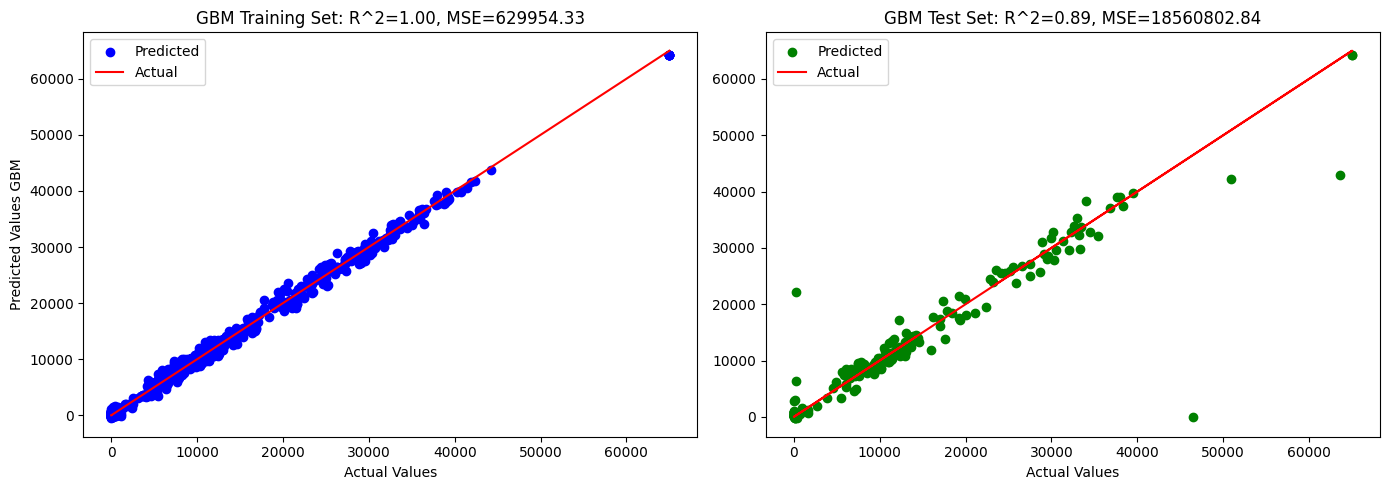

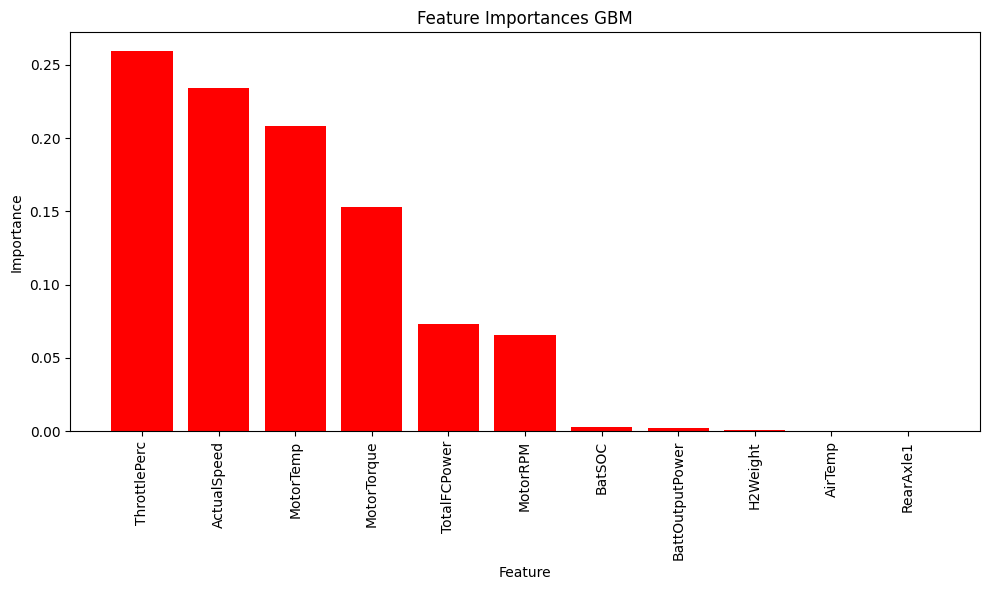

In [235]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize and fit the Gradient Boosting Regressor
gbm_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_regressor.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred_gbm = gbm_regressor.predict(X_train)
y_test_pred_gbm = gbm_regressor.predict(X_test)

# Calculate and print performance metrics
train_mse_gbm = mean_squared_error(y_train, y_train_pred_gbm)
test_mse_gbm = mean_squared_error(y_test, y_test_pred_gbm)
train_r2_gbm = r2_score(y_train, y_train_pred_gbm)
test_r2_gbm = r2_score(y_test, y_test_pred_gbm)

print(f"Training MSE: {train_mse_gbm:.3f}")
print(f"Test MSE: {test_mse_gbm:.3f}")
print(f"Training R^2: {train_r2_gbm:.3f}")
print(f"Test R^2: {test_r2_gbm:.3f}")

# Plotting Actual vs Predicted values for both training and testing sets
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(y_train, y_train_pred_gbm, color='blue', label='Predicted')
axes[0].plot(y_train, y_train, color='red', label='Actual')  # Ideal line where predicted values equal actual values
axes[0].set_title(f'GBM Training Set: R^2={train_r2_gbm:.2f}, MSE={train_mse_gbm:.2f}')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values GBM')
axes[0].legend()

axes[1].scatter(y_test, y_test_pred_gbm, color='green', label='Predicted')
axes[1].plot(y_test, y_test, color='red', label='Actual')
axes[1].set_title(f'GBM Test Set: R^2={test_r2_gbm:.2f}, MSE={test_mse_gbm:.2f}')
axes[1].set_xlabel('Actual Values')
axes[1].legend()

plt.tight_layout()
plt.show()

# Extracting feature importances
feature_importances_gbm = gbm_regressor.feature_importances_

# Sort the indices of feature importances in descending order
indices = np.argsort(feature_importances_gbm)[::-1]

# Retrieve the sorted feature names based on these indices
sorted_feature_names = X_train.columns[indices]

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances GBM')
plt.bar(range(X_train.shape[1]), feature_importances_gbm[indices], color='r', align='center')
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


In [231]:
#Apply the GBM model on the original data

import pandas as pd

# Assuming 'df', 'model', and 'X_train' are already defined


feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else ["BatSOC", "ThrottlePerc", "RearAxle1", "H2Weight", "MotorRPM", "MotorTemp", "BattOutputPower", "TotalFCPower",  "ActualSpeed", "AirTemp"]

# Selecting the relevant features from the new dataframe
X_new_gbm = df[feature_names]

# Drop the nans
X_new_cleaned_gbm = X_new_gbm.dropna()

# Making predictions

y_new_pred_gbm = gbm_regressor.predict(X_new_cleaned_gbm)

# Insert predictions into the cleaned DataFrame
X_new_cleaned_gbm['Predicted_TotalPowerDraw'] = y_new_pred_gbm

# If you want to merge the predictions back into the original DataFrame, use an identifier or index to merge on
# Assuming df_hourly_numeric and X_new_cleaned share a common index or identifier that survived the dropna
# For simplicity, if the index is maintained, you can reindex or merge based on the index

df_with_predictions_gbm = df.merge(X_new_cleaned_gbm[['Predicted_TotalPowerDraw']], how='left', left_index=True, right_index=True)

# Now df_hourly_numeric_with_predictions contains the original data plus a new column with predicted values where available, NaNs elsewhere

# Calculate the Percentage Difference
# Ensure 'TotalPowerDraw' is in df_with_predictions. If not, adjust the source DataFrame accordingly.
df_with_predictions_gbm['Percentage_Difference'] = (abs(df_with_predictions_gbm['TotalPowerDraw'] - df_with_predictions_gbm['Predicted_TotalPowerDraw']) / df_with_predictions_gbm['TotalPowerDraw']) * 100

# Optional: Handle cases where TotalPowerDraw is zero to avoid division by zero issues
df_with_predictions_gbm['Percentage_Difference'] = df_with_predictions_gbm['Percentage_Difference'].replace([np.inf, -np.inf], np.nan)

print('Predictions with GBM')
print(df_with_predictions_gbm[['TotalPowerDraw', 'Predicted_TotalPowerDraw', 'Percentage_Difference']])



Predictions with GBM
      TotalPowerDraw  Predicted_TotalPowerDraw  Percentage_Difference
0       13713.046695              13103.516211               4.444895
1        9444.155245               8630.468432               8.615771
2       12075.898738              12377.403153               2.496745
3       40680.984837              39793.925820               2.180525
4        5412.054734               5193.992592               4.029193
...              ...                       ...                    ...
2645     5549.933717               3413.326357              38.497890
2648      602.394526                522.301471              13.295781
2650      689.177584                586.588659              14.885703
2659      266.421418               -204.458799             176.742629
2661      876.396552                137.608524              84.298372

[954 rows x 3 columns]
